<a href="https://colab.research.google.com/github/h-neal/Matt-Macarty-Algorithmic-Trading-Youtube-Series/blob/main/2_Introduction_to_Scatter_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scatter Plots with matplotlib**

**1. Setup Environment**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import seaborn as sns
from matplotlib import rcParams

import yfinance as yf
import pandas as pd

In [6]:
# Define the tickers and date range
tickers = ['GOOG', 'AMZN', 'GLD']
start_date = '2024-05-11'

# Download data using yfinance
data = yf.download(tickers, start=start_date)['Close']

# Display the data
data.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GLD,GOOG
Date,,,
2024-05-13,186.570007,216.259995,170.094360
2024-05-14,187.070007,218.089996,171.119492
2024-05-15,185.990005,220.889999,173.060303
2024-05-16,183.630005,220.029999,174.602997
2024-05-17,184.699997,223.660004,176.454239


**2. Scatter plot of closing prices**

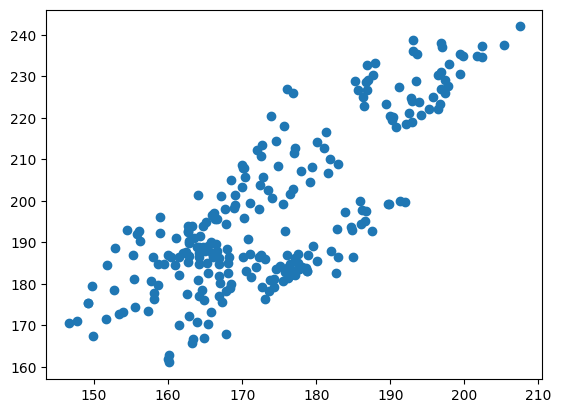

In [7]:
plt.scatter(data.GOOG, data.AMZN)

**3. Transform data and create scatter plot**

In [10]:
returns = np.log(data).diff() # Call the diff() method to calculate the difference
returns.head()
returns.dropna(inplace=True)

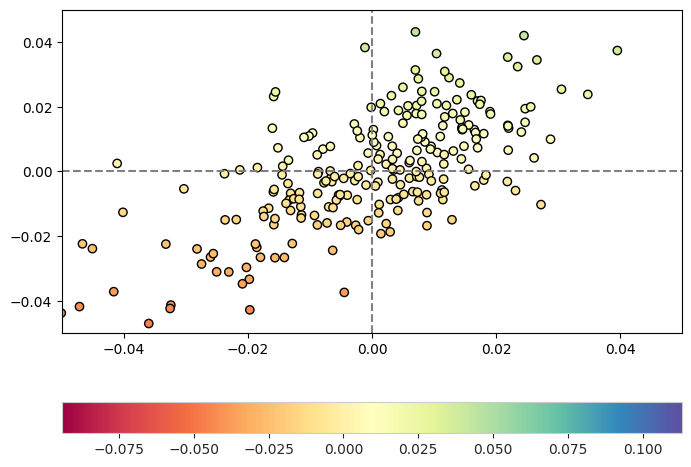

In [18]:
rcParams['figure.figsize'] = 8,6
plt.axvline(0, c=(.5, .5, .5), ls='--')
plt.axhline(0, c=(.5, .5, .5), ls='--')
# Set the style using seaborn
# plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid") # Use seaborn to set the style to 'whitegrid'
plt.scatter(returns.GOOG, returns.AMZN, c=returns.AMZN, cmap='Spectral', edgecolor='k');
plt.colorbar(orientation='horizontal');
plt.ylim(-.05, .05)
plt.xlim(-.05, .05);

In [19]:
# default is marker size in points squared --> bubble grpah
s = returns['AMZN'] = np.abs(returns['AMZN'])

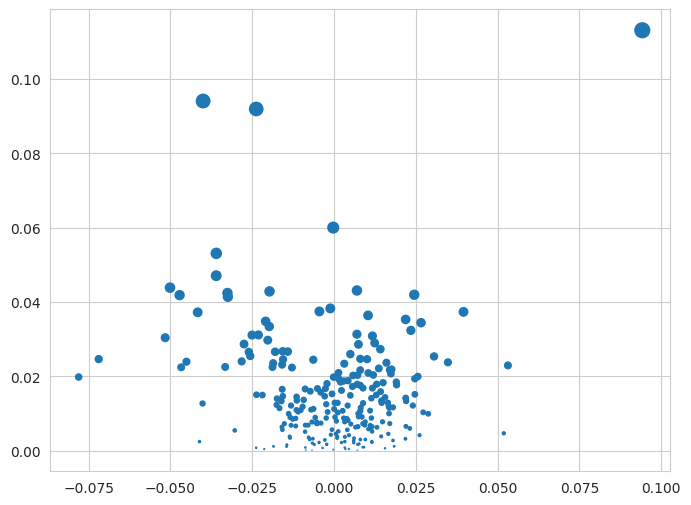

In [20]:
plt.scatter(returns.GOOG, returns.AMZN, s=s *1000);

In [28]:
# Download data for GOOG and AMZN
more = yf.download(['GOOG', 'AMZN'], start='2018-01-01')['Close']

# Calculate log returns
more_ret = np.log(more).diff()
more_ret.dropna(inplace=True)

[*********************100%***********************]  2 of 2 completed


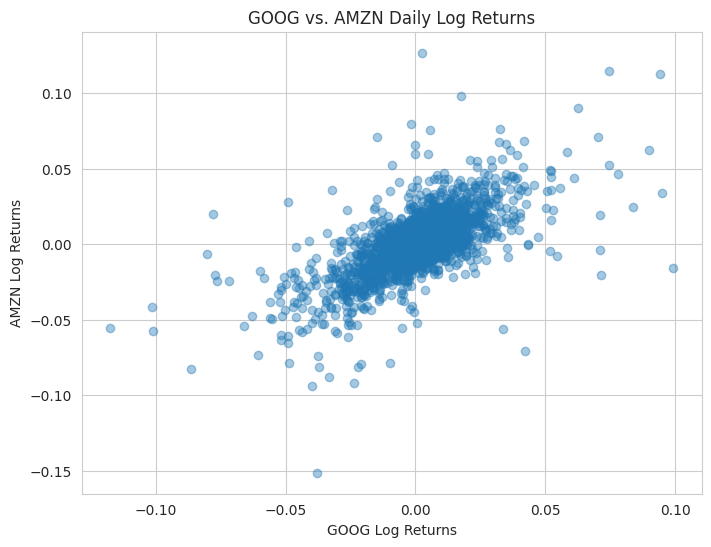

In [31]:
# Plot the returns
plt.figure(figsize=(8, 6))
plt.scatter(more_ret['GOOG'], more_ret['AMZN'], alpha=0.4)
plt.xlabel('GOOG Log Returns')
plt.ylabel('AMZN Log Returns')
plt.title('GOOG vs. AMZN Daily Log Returns')
plt.grid(True)
plt.show()